<a href="https://colab.research.google.com/github/LN2106/churners/blob/main/RF_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Load the uploaded file
churn_data = pd.read_csv('/content/drive/MyDrive/churn/bank datasets/Churn_Modelling.csv')

# Display basic information about the dataset
print(churn_data.info())
print(churn_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1 

In [5]:
churn_data.shape

(10002, 14)

**handling missing values**

In [6]:
#churn_data.isnull().sum()# shows null values

In [7]:
missing_values = churn_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


,0
Geography,1
Age,1
HasCrCard,1
IsActiveMember,1


In [8]:
# Calculate the percentage of missing values for each column
#missing_percentage = churn_data.isnull().sum() / len(data) * 100
#missing_percentage = missing_percentage[missing_percentage > 0]
#missing_percentage

In [9]:
# Replace missing values
# For categorical column 'Geography', replace with mode
churn_data['Geography'].fillna(churn_data['Geography'].mode()[0], inplace=True)

# For numerical column 'Age', replace with mean
churn_data['Age'].fillna(churn_data['Age'].mean(), inplace=True)

# For binary columns 'HasCrCard' and 'IsActiveMember', replace with mode
churn_data['HasCrCard'].fillna(churn_data['HasCrCard'].mode()[0], inplace=True)
churn_data['IsActiveMember'].fillna(churn_data['IsActiveMember'].mode()[0], inplace=True)

# Check if missing values are handled
churn_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Encoding  catagorical data**

In [10]:
# Encode 'Gender' using label encoding: Female -> 0, Male -> 1
churn_data['Gender'] = churn_data['Gender'].map({'Female': 0, 'Male': 1})

# One-hot encode 'Geography'
churn_data = pd.get_dummies(churn_data, columns=['Geography'], drop_first=True)

# Display the first few rows of the updated dataset to confirm changes
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False
1,2,15647311,Hill,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True
2,3,15619304,Onio,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0,False,True


In [11]:
churn_data.shape

(10002, 15)

**feature scaling**

In [12]:
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
churn_data[columns_to_scale] = scaler.fit_transform(churn_data[columns_to_scale])

# Display the first few rows of the scaled dataset
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,-0.326465,0,0.293500,-1.041728,-1.226009,-0.911597,1.0,1.0,0.022008,1,False,False
1,2,15647311,Hill,-0.440270,0,0.198136,-1.387530,0.117274,-0.911597,0.0,1.0,0.216663,0,False,True
2,3,15619304,Onio,-1.536934,0,0.293500,1.033084,1.333054,2.527132,1.0,0.0,0.240817,1,False,False
3,4,15701354,Boni,0.501205,0,0.007409,-1.387530,-1.226009,0.807768,0.0,0.0,-0.108802,0,False,False
4,5,15737888,Mitchell,2.063434,0,0.388864,-1.041728,0.785694,-0.911597,1.0,1.0,-0.365171,0,False,True


The numerical features have been successfully scaled, ensuring that they have a mean of 0 and a standard deviation of 1. This step helps improve the performance of many machine learning algorithms by ensuring all features contribute equally.

**spliting and droping the useless colum**n

In [13]:
from sklearn.model_selection import train_test_split

# Dropping unnecessary columns
churn_data_cleaned = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Defining the feature set (X) and target variable (y)
X = churn_data_cleaned.drop('Exited', axis=1)
y = churn_data_cleaned['Exited']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8001, 11), (2001, 11), (8001,), (2001,))

the dataset has been successfully split into training and testing sets:

Training set: 8,001 samples (80% of the data)
Testing set: 2,001 samples (20% of the data)

**RANDOM FOREST**

**What is a Random Forest?**
Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It works by training each decision tree on a different subset of the data and averaging their predictions to make the final decision. This method helps to reduce overfitting and improve generalization.

**Steps to Train a Random Forest Model**

Model Initialization: Set up the Random Forest model with desired parameters, such as the number of trees in the forest.

Model Training: Fit the model to the training data.

Model Prediction: Use the trained model to make predictions on the test data.

Model Evaluation: Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.





In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data visualization
plt.style.use('ggplot')

# Step is complete; no output needed at this point
"Step 1 complete: Libraries imported."

'Step 1 complete: Libraries imported.'

In [20]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

"Step 2 complete: Random Forest model initialized and trained."


'Step 2 complete: Random Forest model initialized and trained.'

In [21]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

"Step 3 complete: Predictions made on the test set."

'Step 3 complete: Predictions made on the test set.'

In [17]:
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

classification_rep, accuracy

('              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92      1599\n           1       0.74      0.50      0.59       402\n\n    accuracy                           0.86      2001\n   macro avg       0.81      0.73      0.76      2001\nweighted avg       0.85      0.86      0.85      2001\n',
 0.8640679660169915)

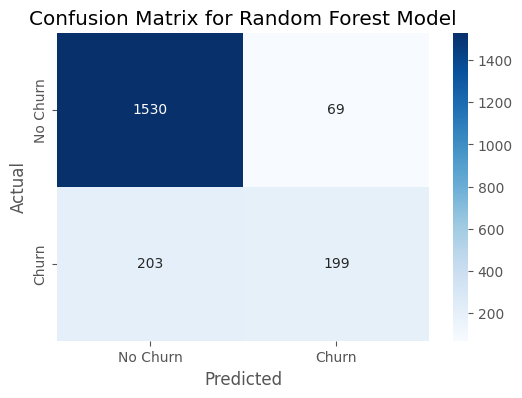

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()